<a href="https://colab.research.google.com/github/douglassesi/trabalho_final_python/blob/douglas/Trabalho_EDA_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final - Análise de Dados com Python

Integrantes:

    1) Douglas Albuquerque
    2) Gaston
    3) Pedro
    4) Vitor

### Qual será seu trabalho aqui?

Basicamente, vocês devem usar todo conhecimento que adquiriram durante o curo e criar um modelo de Regressão Linear cujo RMSE seja em torno de 69000, o que significa que o erro de predição é, em média, de 69000.
Entretanto, para chegar a essa predição, uma série de análise e preparações nos dados devem ser feitas. Vocês devem fazer os todo's que aqui foram deixados a fim de chegar a esse valor numa regressão

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# todos os pacotes que serão utilizados foram importados
# há alguns que não vimos em classe, mas parte do processo de avaliação entender como esses pacotes funcionam
# na prática, são muito similares aos que vimos em sala
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression

In [3]:
# leitura dos dados
housing = pd.read_csv('/content/drive/My Drive/Datasets/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### TODO 1: Análise e visualização de dados

    1) Use o método info e o método describe para entender como os dados se comportam
    2) percebemos que existe uma coluna cujos valores são object. Quantos valores existem para cada atributo presente nessa coluna?
    3) plote um histograma de cada coluna numérica para entender a distribuição dos dados. Use 50 bins e ajuste o tamanho das imagens para (20,15)

O que você pode observar a partir dos histogramas? Os dados podem ser inseridos num algoritmo de machine learning da maneira que estão? Dica: não!! 

Tente descrever o motivo. 

In [4]:
# resposta 1

housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# resposta 2

housing['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [0]:
# resposta 3

housing.hist(bins=50, color='blue')
plt.figure(figsize=(20,15))

### TODO 2: Criando conjunto de treino e teste
    4) utilizando train_test_split, da Scikit-Learn, separe o conjunto em treino e teste. utilize train_set e test_set como nome de variáveis, separe 20% para conjunto de teste e utilize 42 como random_state

In [0]:
# resposta 4


split_size = 0.2
train_set, test_set = train_test_split(housing, test_size=split_size, random_state=42)


### TODO 3: Correlação e visualização

    5) Quais as variáveis que mais possuem correlação com o atributo median_house_value?
    6) Utilize scatter_matrix, do pandas para visualizar a correlação do atributo median_house_value com os atributos que possuem maior correlação com ele. Ajuste o tamanho das imagens para (12, 8)

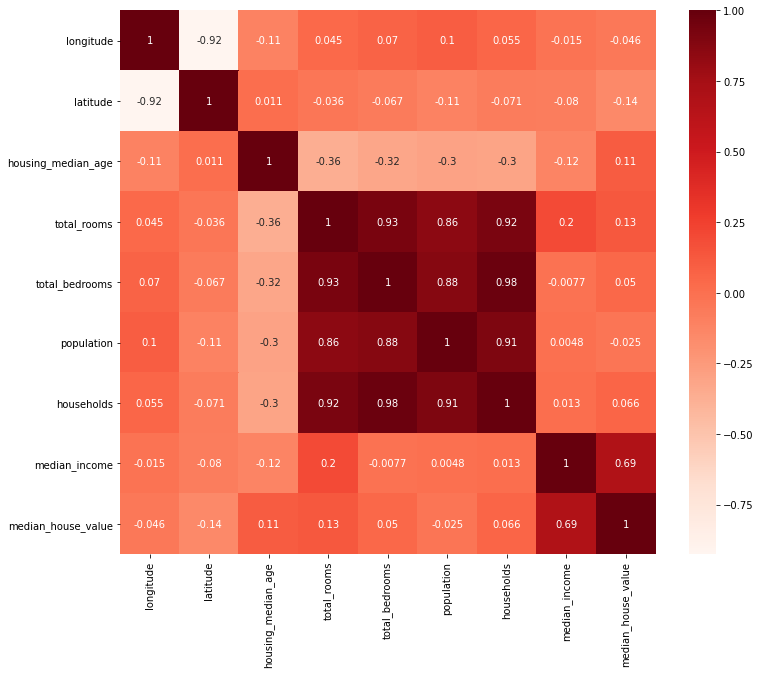

In [0]:
# resposta 5

import seaborn as sns
plt.figure(figsize=(12,10))
cor = housing.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
# resposta 6

pd.plotting.scatter_matrix(housing, diagonal='kde')

### TODO 4: Limpeza de dados

Ao usar o método info(), descobrimos que existem alguns dados faltantes no nosso algoritmo. A partir daqui, a variável housing será o conteúdo de train_set, excluindo-se a coluna meta (median_house_value).  Atribua para a variável housing_labels uma cópia de train_set só com informações da coluna meta

    7) use simpleImputer para tratar os valores faltantes. Escolha a estratégia que achar mais conveniente

In [7]:
# resposta 7




#Quantidade de linhas em branco no dataset
vazios = housing.isnull().sum(axis = 0)

print('Colunas que possuem linhas vazias: ',vazios)





Colunas que possuem linhas vazias:  longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [18]:
# resposta 7 (continuação)

housing_labels = train_set

imputer = SimpleImputer(missing_values=np.nan, strategy='median')


housing_labels.isnull().sum(axis = 0)
housing_labels.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### TODO 4: Manipulação de Atributos categóricos
    7) Utilizando OrdinalEncoder, manipule os valores categóricos para preparar os dados corretamente para algoritmos de machine learning

In [25]:
# resposta 7
encoder = OrdinalEncoder()
housing_labels.ocean_proximity =encoder.fit_transform(housing_labels.ocean_proximity.values.reshape(-1, 1))
housing_labels.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,4.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,4.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,4.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,4.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,1.0


### TODO 5: Feature Normalization

Com algumas poucas exceções, algoritmos de machine learning não performam bem quando os atributos numéricos possuem escalas diferentes. Este é o caso de nosso dataset, em que o atributo total_rooms possui um range de 6 a 39320 enquanto median_income varia de 0.5 a 15.

Existem duas abordagens conhecidas para trazer os atributos para uma mesma escala: min-max scaling e standardization. 

min-max scaling (normalization) consiste em subtratir o valor minimo e dividir pela subtração de max por min:

\begin{align}
x = \frac{x - min}{max - min}
\end{align}

A Scikit-Learn provê o método MinMaxScaler que realiza essa operação. 

Já standardization consiste em subtrair a média(valores sempre terao média zero) e então dividir pela variância de modo que a distribuição resultante possua variância unitária. 

\begin{align}
x = \frac{x - \mu}{\sigma}
\end{align}

Diferentemente de normalization, standardization não leva os números a um intervalo específico, o que pode ser um problema para algoritmos específicos (por exemplo, redes neurais geralmente esperam um valor de entrada entre o intervalo 0-1). Entretanto, standdardization é muito menos sensível à outiliers. Scikit-learn provêo método StandardScaler para standardization. 

    8) Adeque os valores de cada coluna numérica para que eles fiquem normalizados. Use o método que achar mais conveniente

In [0]:
# resposta 8

scaler = StandardScaler()
housing_labels = scaler.fit_transform(housing_labels)


### TODO 6: Pipeline de Transformação
    9) crie um pipeline de transformação para tratar os atributos numéricos, outro para tratar os atributos categóricos e um para juntar os dois e preparar todos os dados para entrada num algoritmo de machine learning. Caso queira, pode usar a classe DataFrameSelector vista na aula 4 (recomendável). A variável de saída desse algoritmo deverá se chamar housing_prepared


In [0]:
# resposta 9

### TODO 7: Regressão Linear

    10) Ajuste uma regressão linear aos dados. Utilize a versão da Scikit-Learn

In [0]:
# resposta 10

In [32]:
# Apenas para testar seu resultado
some_data = housing.iloc[:5] # dados para predizer
some_labels = housing_labels.iloc[:5] # rótulos dos dados acima
some_data_prepared = full_pipeline.transform(some_data) # transformação dos dados (considerando que seu pipeline tenha esse nome)
print("Predictions:\t", lin_reg.predict(some_data_prepared)) # predizendo
print("Labels:\t\t", list(some_labels)) # valores corretos

AttributeError: ignored

### TODO 8: RMSE 
    11) Utilizando Scikit-Learn, extraia o RMSE das predições a partir da variável housing_prepared. 

In [0]:
# resposta 11

In [0]:

#feature_col = housing.iloc[:,0:6]
#meta_col =  housing.iloc[:,7]
feature_col = housing.loc[:,['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
meta_col = housing.loc[:,['median_house_value']]

X = feature_col.values
y = meta_col.values